In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Download and analyze data

In [51]:
df = pd.read_csv('Data/BlackFridaySales.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


 Product_Category_2 and Product_Category_3 have null-values

**Check null values and null value in percentage**

In [5]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [6]:
df.isnull().sum()/df.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

There are 31% null values in the Product_Category_2 and 69% null values in the Product_Category_3

In [7]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

There are more unique values in User_ID and Product_ID, so we can drop them for our analysis.

**Target Variable Purchase**

Text(0.5, 1.0, 'Purchase Distribution')

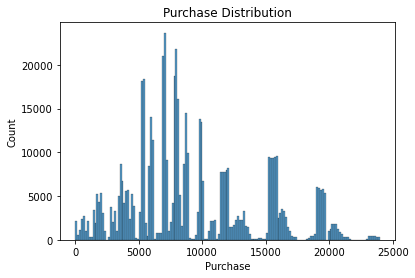

In [8]:
sns.histplot(df["Purchase"])
plt.title("Purchase Distribution")

Text(0.5, 1.0, 'Boxplot of Purchase')

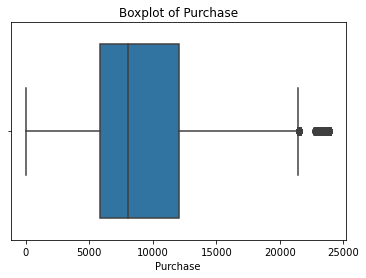

In [9]:
sns.boxplot(df["Purchase"])
plt.title("Boxplot of Purchase")

In [10]:
df['Purchase'].skew()

0.6001400037087128

We can see that the purchase is right skewed.

In [11]:
df['Purchase'].kurtosis()

-0.3383775655851702

In [12]:
df['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

There are multiple peaks in the distribution, hence we can use a log transformation for analysis.

**Analyze based on Gender**

<AxesSubplot:xlabel='Gender', ylabel='count'>

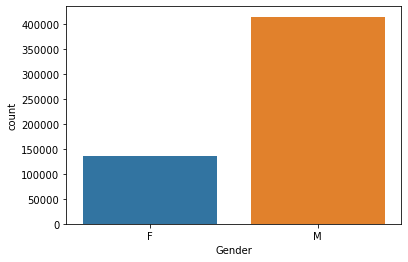

In [13]:
sns.countplot(df['Gender'])

In [14]:
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [15]:
df.groupby('Gender').mean()['Purchase']

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

From above we see that there are more males than females, and males spend more on purchase than females.

**Analyze based on Marital Status**

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

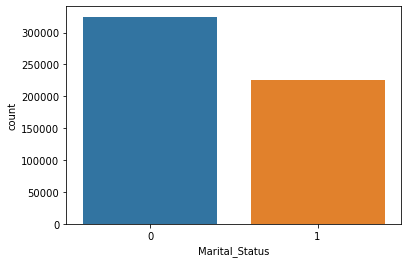

In [16]:
sns.countplot(df['Marital_Status'])

In [17]:
df.groupby("Marital_Status").mean()["Purchase"]

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

Text(0.5, 1.0, 'Marital_Status vs Purchase')

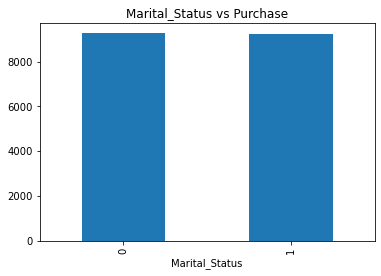

In [18]:
df.groupby("Marital_Status").mean()["Purchase"].plot(kind='bar')
plt.title("Marital_Status vs Purchase")

Now we can conclude that single people spend more than married, but the average purchase is close between them.

**Analyze based on Occupation**

<AxesSubplot:xlabel='Occupation', ylabel='count'>

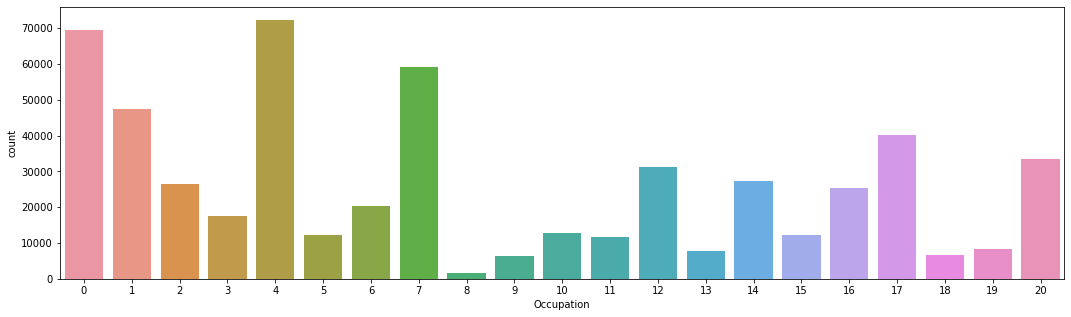

In [19]:
plt.figure(figsize=(18,5))
sns.countplot(df['Occupation'])

Text(0.5, 1.0, 'Boxplot of Occupation')

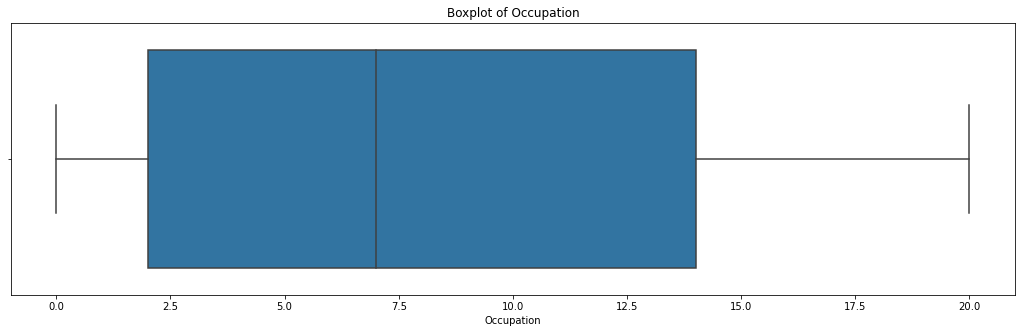

In [20]:
plt.figure(figsize=(18,5))
sns.boxplot(df["Occupation"])
plt.title("Boxplot of Occupation")

Text(0.5, 1.0, 'Occupation vs Purchase')

<Figure size 1296x360 with 0 Axes>

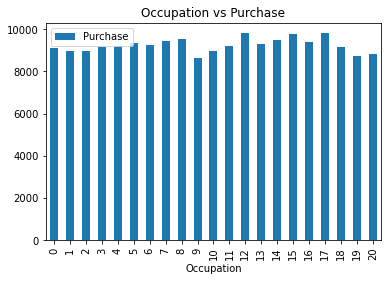

In [21]:
plt.figure(figsize=(18,5))
pd.DataFrame(df.groupby('Occupation').mean()['Purchase']).plot(kind='bar')
plt.title("Occupation vs Purchase")

From above analysis, it seems that it's hard to figure out the make a conclusion based on it. Although there are some occupations which have higher representations, it seems that the amount each user spends on average is more or less the same for all occupations.

**Analyze based on City Category**

<AxesSubplot:xlabel='City_Category', ylabel='count'>

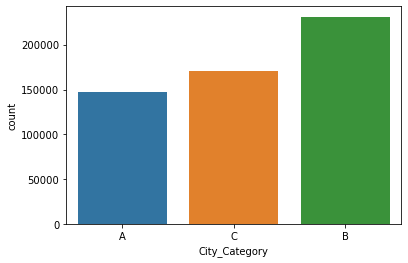

In [22]:
sns.countplot(df['City_Category'])

Text(0.5, 1.0, 'City Category vs Purchase Analysis')

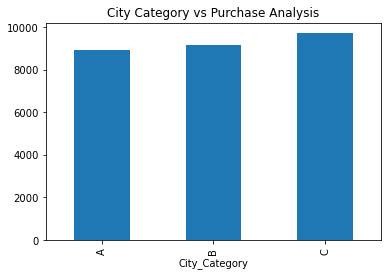

In [23]:
df.groupby("City_Category").mean()["Purchase"].plot(kind='bar')
plt.title("City Category vs Purchase Analysis")

City_Category B made most of purchases while City_Category C paid more.

**Analyze based on Stay_In_Current_City_Years**

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

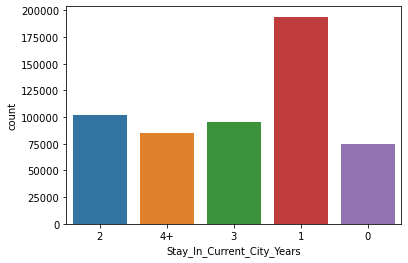

In [25]:
sns.countplot(df['Stay_In_Current_City_Years'])

Looks like that people who are new in the city are more willing to buy new things.

Text(0.5, 1.0, 'Stay_In_Current_City_Years vs Purchase')

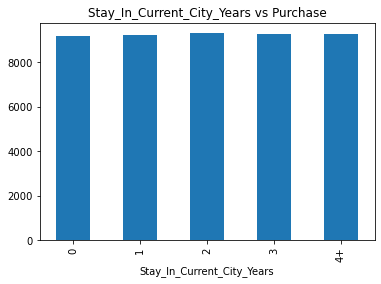

In [27]:
df.groupby("Stay_In_Current_City_Years").mean()["Purchase"].plot(kind='bar')
plt.title("Stay_In_Current_City_Years vs Purchase")

Similar with the Occupation vs Purchase analysis, on average people tend to spend the same amount on purchases regardeless of their group.

**Analyze based on Age**

Text(0.5, 0, 'Different Categories of Age')

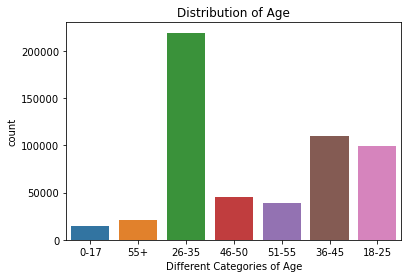

In [28]:
sns.countplot(df['Age'])
plt.title('Distribution of Age')
plt.xlabel('Different Categories of Age')

People in 26-35 are more likely to purchase during Black Friday.

<AxesSubplot:xlabel='Age'>

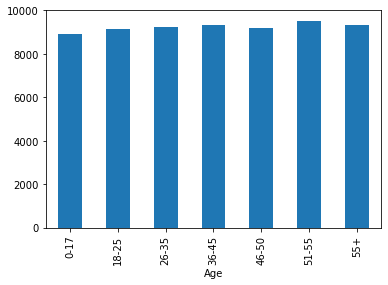

In [31]:
df.groupby("Age").mean()["Purchase"].plot(kind='bar')

Mean puchase rate between the age groups tends to be the same except that the 51-55 age group has a little higher average purchase amount

Text(0.5, 1.0, 'Age VS Purchase')

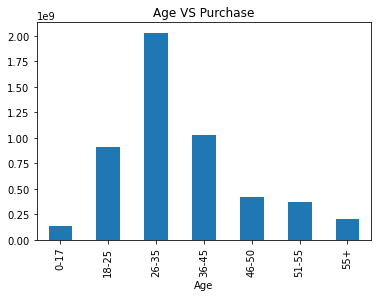

In [34]:
df.groupby("Age").sum()['Purchase'].plot(kind="bar")
plt.title("Age VS Purchase")

Total amount paid disturibtion by ages shows that people in age 26-35 paid most for purchases.

**Analyze based on Product_Category_1**

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

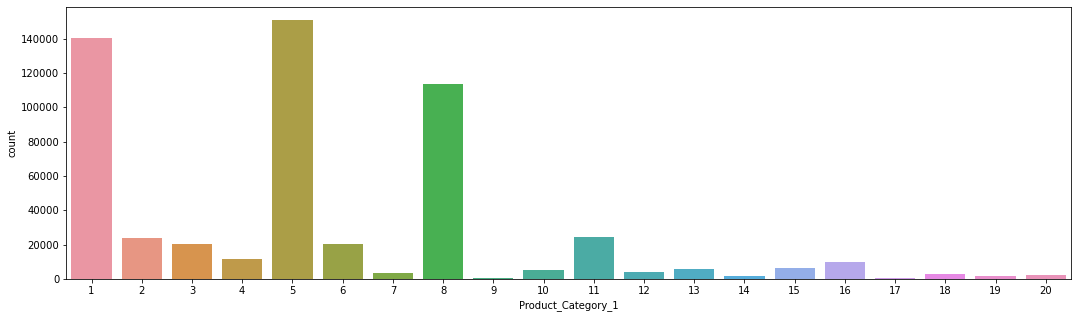

In [36]:
plt.figure(figsize=(18,5))
sns.countplot(df['Product_Category_1'])

Product_Category_1 numbers 1,5 and 8 have significant counts compared with others. However, we don't know which product each number represents as it is masked. 

Text(0.5, 1.0, 'Product_Category_1 and Purchase Mean Analysis')

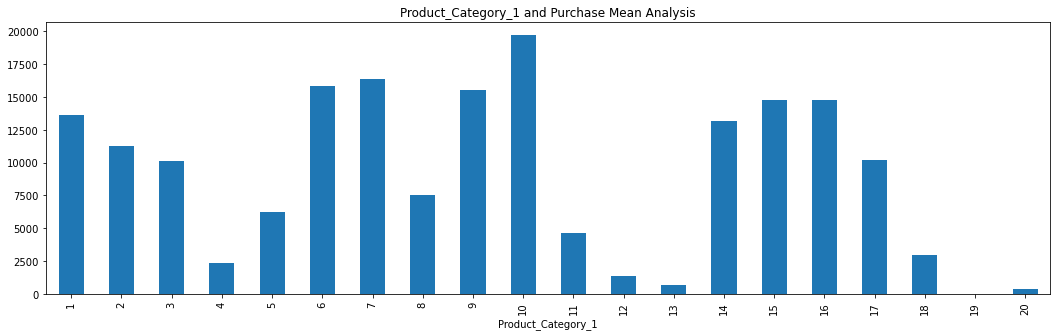

In [37]:
df.groupby('Product_Category_1').mean()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Mean Analysis")

Now we can figure out that the average amount spent for categories 1,5,8 we mentioned above is not the highest.

Text(0.5, 1.0, 'Product_Category_1 vs Purchase')

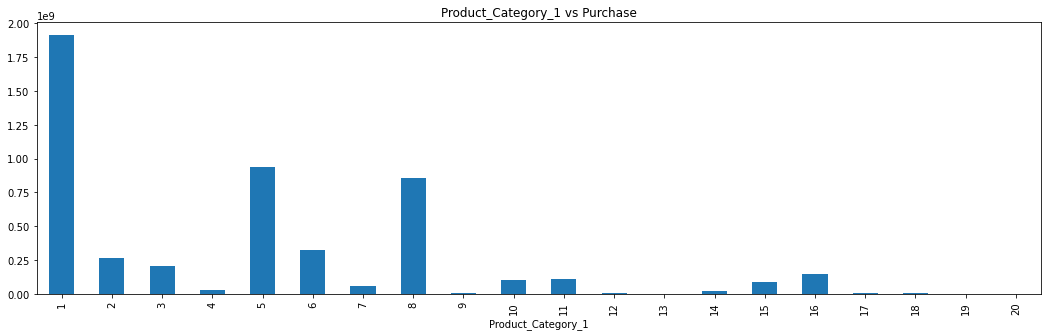

In [38]:
df.groupby('Product_Category_1').sum()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 vs Purchase")

The distribution that we saw for this predictor previously appears here. We can see that for these three product which were sold most, they still have highest sum of sales.

**Analyze based on Product_Category_2 and Product_Category_3**

<AxesSubplot:xlabel='Product_Category_2', ylabel='count'>

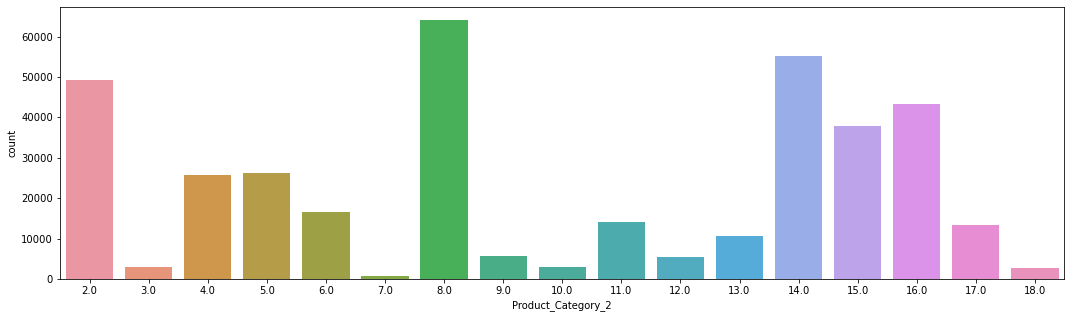

In [40]:
plt.figure(figsize=(18,5))
sns.countplot(df['Product_Category_2'])

Text(0.5, 1.0, 'Product_Category_2 and Purchase Mean Analysis')

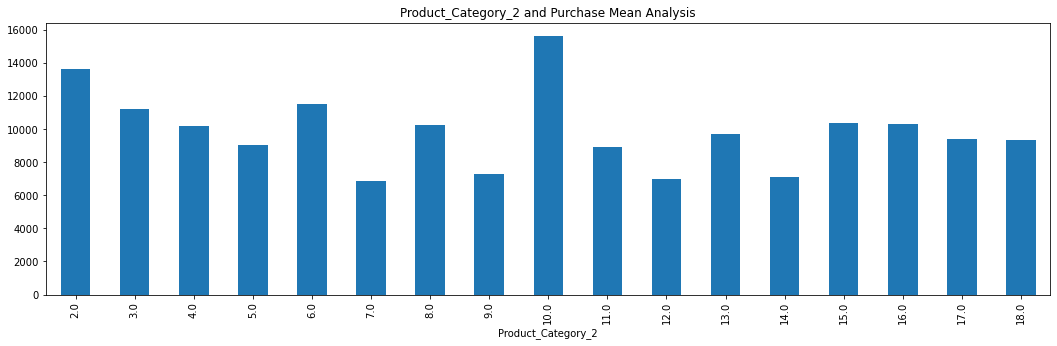

In [45]:
df.groupby('Product_Category_2').mean()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_2 and Purchase Mean Analysis")

Text(0.5, 1.0, 'Product_Category_2 vs Purchase')

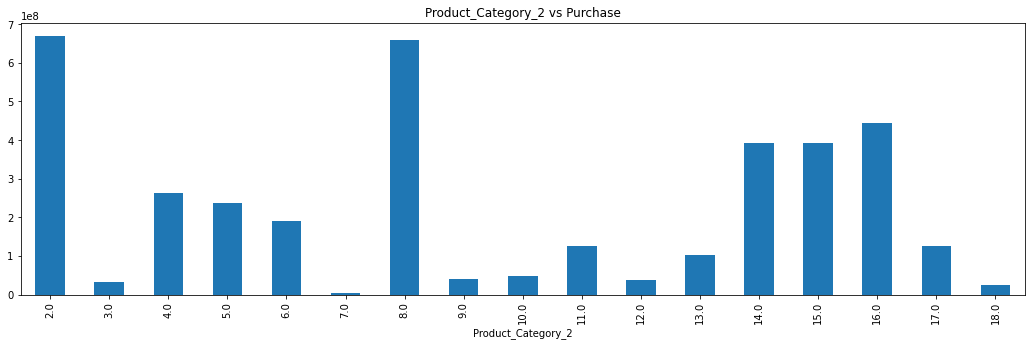

In [42]:
df.groupby('Product_Category_2').sum()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_2 vs Purchase")

<AxesSubplot:xlabel='Product_Category_3', ylabel='count'>

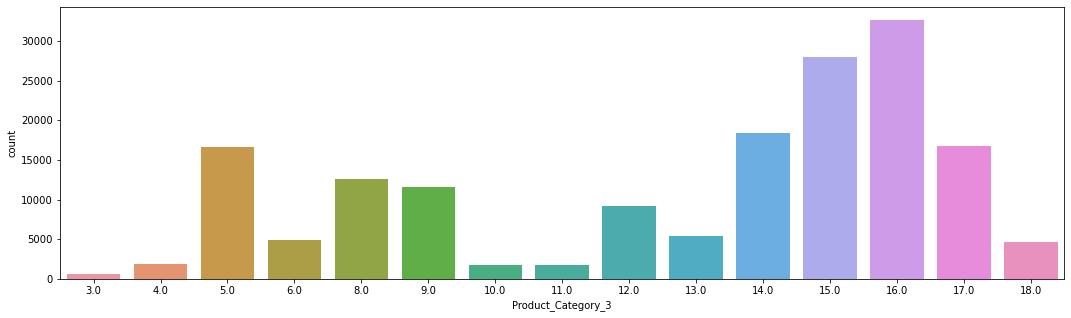

In [41]:
plt.figure(figsize=(18,5))
sns.countplot(df['Product_Category_3'])

Text(0.5, 1.0, 'Product_Category_3 and Purchase Mean Analysis')

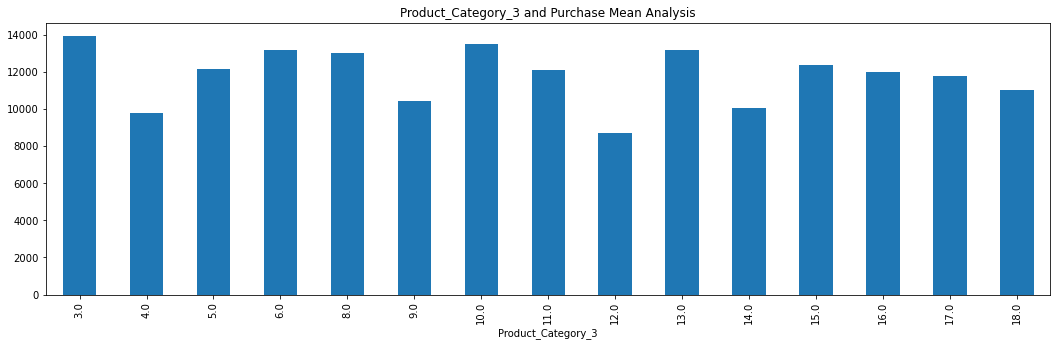

In [46]:
df.groupby('Product_Category_3').mean()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_3 and Purchase Mean Analysis")

Text(0.5, 1.0, 'Product_Category_3 vs Purchase')

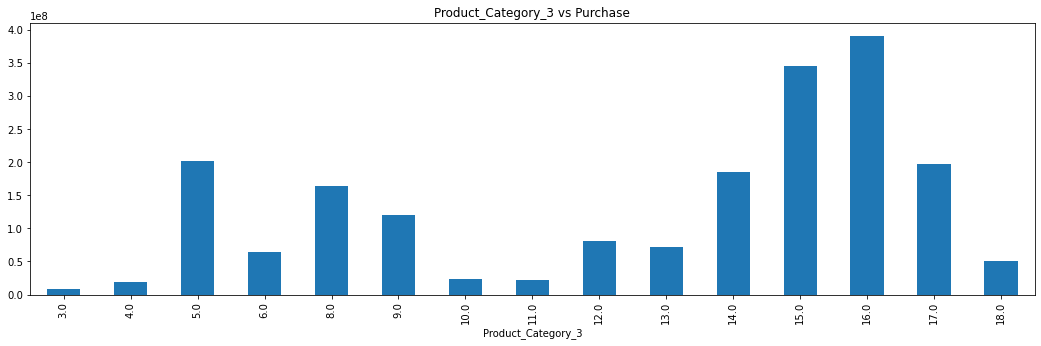

In [43]:
df.groupby('Product_Category_3').sum()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_3 vs Purchase")

**Data Correlation and Heatmap**

In [48]:
df.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


<AxesSubplot:>

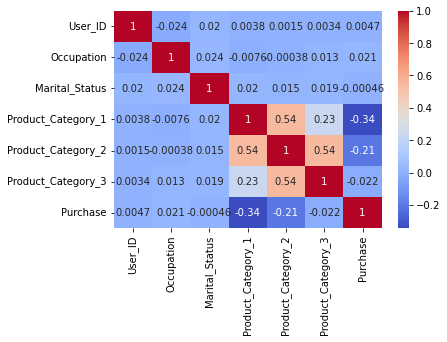

In [49]:
sns.heatmap(df.corr(),cmap = 'coolwarm', annot = True)

In [58]:
df = pd.get_dummies(df, columns=['Stay_In_Current_City_Years'])

## Encoding the categorical variables

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
le = LabelEncoder() # Normalize the label

In [60]:
df['Gender'] = le.fit_transform(df['Gender'])
df['Age'] = le.fit_transform(df['Age'])
df['City_Category'] = le.fit_transform(df['City_Category'])

In [62]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(0).astype('int64')
df['Product_Category_3'] = df['Product_Category_3'].fillna(0).astype('int64')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   User_ID                        550068 non-null  int64 
 1   Product_ID                     550068 non-null  object
 2   Gender                         550068 non-null  int64 
 3   Age                            550068 non-null  int64 
 4   Occupation                     550068 non-null  int64 
 5   City_Category                  550068 non-null  int64 
 6   Marital_Status                 550068 non-null  int64 
 7   Product_Category_1             550068 non-null  int64 
 8   Product_Category_2             550068 non-null  int64 
 9   Product_Category_3             550068 non-null  int64 
 10  Purchase                       550068 non-null  int64 
 11  Stay_In_Current_City_Years_0   550068 non-null  uint8 
 12  Stay_In_Current_City_Years_1   550068 non-nu

In [ ]:
Now we can drop useless data:

In [66]:
df = df.drop(['User_ID','Product_ID'],axis=1)

## Splitting data

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X = df.drop('Purchase',axis = 1)
y = df['Purchase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modeling

### Linear Regression

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error, r2_score
from math import sqrt

In [70]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [71]:
lr.intercept_ # Slope 

9536.400764131498

In [73]:
lr.coef_ # Changes in a Response Variable

array([ 465.82318446,  112.36643445,    5.05508596,  314.06766138,
        -58.23217776, -348.4514785 ,   12.98415047,  143.49190467,
        -20.83796687,    5.4676518 ,   17.68367185,   -3.96751734,
          1.65416056])

In [90]:
lr_y_pred = lr.predict(X_test)

In [91]:
mse = mean_squared_error(y_test, lr_y_pred)

In [92]:
print('RMSE of Linear Regression Model is', sqrt(mse))

RMSE of Linear Regression Model is 4625.781368526566


In [98]:
lr_y_pred

array([ 7395.38325151,  3011.03986836, 12683.24336215, ...,
       12365.16290499,  8974.98551381,  7175.93282126])

### DecisionTreeRegressor

In [93]:
from sklearn.tree import DecisionTreeRegressor

In [94]:
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [95]:
dt_y_pred = dt.predict(X_test)

In [100]:
mse_dt = mean_squared_error(y_test, dt_y_pred)

In [101]:
print("RMSE of Linear Regression Model is ",sqrt(mse_dt))

RMSE of Linear Regression Model is  3361.633452177241


Decision Tree Regressor performs better than Linear Regression

### RandomForestRegressor

In [104]:
from sklearn.ensemble import RandomForestRegressor

In [105]:
rf = RandomForestRegressor(random_state = 0)  

In [107]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [108]:
rf_y_pred = rf.predict(X_test)

In [109]:
mse_rf = mean_squared_error(y_test, rf_y_pred)

In [110]:
print("RMSE of Linear Regression Model is ",sqrt(mse_rf))

RMSE of Linear Regression Model is  3051.35541573242


### XGBoost Regressor

In [111]:
from xgboost.sklearn import XGBRegressor

In [112]:
xgb = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.0, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=40, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [113]:
xgb_y_pred = xgb.predict(X_test)

In [114]:
mse_xgb = mean_squared_error(y_test, xgb_y_pred)

In [115]:
print("RMSE of Linear Regression Model is ",sqrt(mse_xgb))

RMSE of Linear Regression Model is  2875.5525007114747


By comparing the RMSE between above four models, we can conclude that the best the ML algorithm for our sales prediction is XGBoost Regressor Model with RMSE = 2879.

ref: https://github.com/nanthasnk/Black-Friday-Sales-Prediction